## Exercice 4

\begin{equation}
\dfrac{du}{dt}=Au+F(u,t)	
\end{equation}


\begin{enumerate}
\item \textbf{Show that:}\\
\begin{equation}
	u(t_{n+1})=e^{hA}u(t_{n})+\int_{0}^{h}e^{-(\tau-h)A}F(u(t_{n}+\tau),t_{n}+\tau)d\tau 
\end{equation}

By multiplying equation (1) by $e^{-At}$, we have:

\begin{align*}
	\dfrac{du}{dt}e^{-At}=(Au+F(u,t))e^{-At}&\implies e^{-At}du-Ae^{-At}udt=e^{-At}F(u,t)dt\\
	&\implies \dfrac{d}{dt}(ue^{-At})=e^{-At}F(u,t)\\
	&\implies d(ue^{-At})=e^{-At}F(u,t)dt\\
	&\implies \int_{t_{n}}^{t_{n+1}}d(ue^{-At})=\int_{t_{n}}^{t_{n+1}}e^{-At}F(u,t)dt\\
	&\implies [ue^{-At}]_{t_{n}}^{t_{n+1}}=\int_{t_{n}}^{t_{n+1}}e^{-At}F(u,t)dt\\
	&\implies u(t_{n+1})e^{-At_{n+1}}-u(t_{n})e^{-At_{n}}=\int_{t_{n}}^{t_{n+1}}e^{-At}F(u,t)dt\\
	&\implies u(t_{n+1}) =u(t_{n})e^{A(t_{n+1}-t_{n})}+e^{At_{n+1}}\int_{t_{n}}^{t_{n+1}}e^{-At}F(u,t)dt\\
	&\implies u(t_{n+1}) =u(t_{n})e^{A(t_{n+1}-t_{n})}+ \int_{t_{n}}^{t_{n+1}}e^{A(t_{n+1}-t)}F(u,t)dt\\
\end{align*}
 Since $h=t_{n+1}-t_{n}$, we have $t_{n+1}=h+t_{n}$ then :
 \begin{align*}
 	u(t_{n+1}) =u(t_{n})e^{hA}+ \int_{t_{n}}^{t_{n+1}}e^{A(h+t_{n}-t)}F(u(t),t)dt\\
 \end{align*}
Let doing the change variable: $\tau=t-t_{n}$ \\
$t=t_{n}\implies \tau=0 $ and $t=t_{n+1}\implies \tau=t_{n+1}-t_{n}=h $ ie :\\
\begin{align*}
	u(t_{n+1}) =u(t_{n})e^{hA}+ \int_{t_{n}}^{t_{n+1}}e^{A(h-\tau)}F(u(t_{n}+\tau),t_{n}+\tau)dt\\ 
\end{align*}
Then we have \begin{equation*}
	u(t_{n+1})=e^{hA}u(t_{n})+\int_{0}^{h}e^{-(\tau-h)A}F(u(t_{n}+\tau),t_{n}+\tau)d\tau 
\end{equation*}
\item Let us denote the numerical approximation to $ u(t_{n}) $ by $ u_{n} $ and write $ F(u_{n}, t_{n}) $ as $ F_{n} $.
By assuming $ F $ is constant, $ F \approx F_{n} $$ $, between $ t = t_{n} $ to $ t = t_{n+1} $, show that Eq(2)
becomes
\begin{align}
	u_{n+1}=e^{hA}u_{n}+(e^{hA}-I)A^{-1}F_{n}
\end{align}

We have :
\begin{align*}
	u(t_{n+1})=e^{hA}u(t_{n})+\int_{0}^{h}e^{-(\tau-h)A}F(u(t_{n}+\tau),t_{n}+\tau)d\tau &\implies u_{n+1}=e^{hA}u_{n}+\int_{0}^{h}e^{-(\tau-h)A}F d\tau\\
	&\implies  u_{n+1}=e^{hA}u_{n}+F_{n}\int_{0}^{h}e^{-(\tau-h)A}d\tau\\
	&\implies u_{n+1}=e^{hA}u_{n}+F_{n}[-A^{-1}e^{-(\tau-h)A}]_{0}^{h}\\
	&\implies u_{n+1}=e^{hA}u_{n}+(e^{hA}-I)A^{-1}F_{n} 
\end{align*}

\end{enumerate}


### 3. Write a python function, ExpoMethod that takes a, b, A, F, h, u 0 as input and return the list of u n (using Eq(3)) and the list of t n .

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def ExpoMethod(a,b,A,F,h,u0):
    n=(b-a)/h+1
    t=np.linspace(a,b,int(n))
    M=np.exp(h*A)
    u=np.zeros((len(t),len(u0)))
    u[0]=u0 
    for i in range(len(t)-1):
        u[i+1]=M@u[i]+(M-np.identity(np.shape(M)[0]))@np.invert(A)@F(u[i],t[i])
    return u,t
    

(101,)

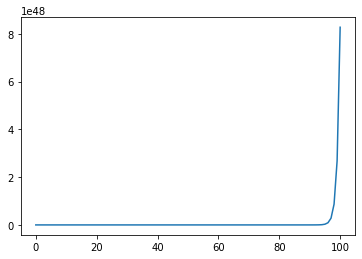

In [7]:
def F(u,t):
     return np.array([0,0,0])
a=0
b=1
A=np.array(([3,1,2],[4,5,1],[2,3,4]))
h=0.01
u0=np.array([0,1,2])
plt.plot((ExpoMethod(a,b,A,F,h,u0)[0])[:,0])
#F(u0,np.linspace(0,1,2))
np.shape(((ExpoMethod(a,b,A,F,h,u0)[0])[:,0]))

### Let us consider the system of ODE in Question 1 of Exercise 3 on [0, 1] (Notethat in this case F (u, t) = 0). Plot in different graph
#### (a) the components of the exact and approximate solution obtained with ExpoMethod against the time.

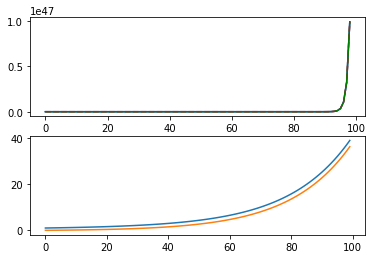

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot((ExpoMethod(a,b,A,F,h,z0)[0])[:,0],'b-')
plt.plot((ExpoMethod(a,b,A,F,h,z0)[0])[:,1],'r--')
plt.plot((ExpoMethod(a,b,A,F,h,z0)[0])[:,2],'g-')

plt.subplot(2,1,2)
t=np.linspace(0,1,100)
x_1=1/4*(np.exp(5*t)+3*np.exp(t))
x_2=1/4*(np.exp(5*t)-np.exp(t))
x_3=x_2
plt.plot(x_1)
plt.plot(x_2)

### (b) the absolute error between the exact and approximate solution.

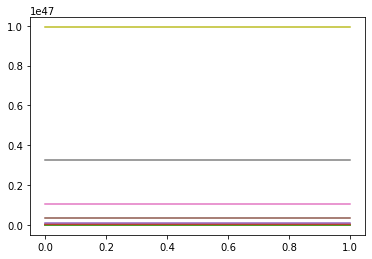

In [34]:
err1=abs(x_1.reshape(-1,1)-(ExpoMethod(a,b,A,F,h,z0)[0])[:,0])
err2=abs(x_2.reshape(-1,1)-(ExpoMethod(a,b,A,F,h,z0)[0])[:,1])
err3=abs(x_1.reshape(-1,1)-(ExpoMethod(a,b,A,F,h,z0)[0])[:,2])

plt.plot(t,err1);

### 5.By using ExpoMethod, plot the components of the numerical solution of Eq (1) on [0, 1] when

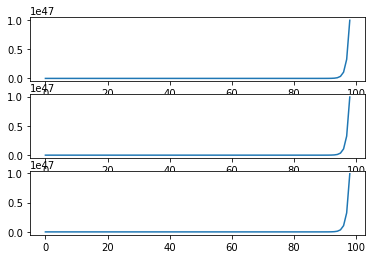

In [41]:
A=np.array(([2,2,1],[1,3,1],[1,2,2]))
u0=np.array([1,0,0])
def F(u,t):
     return np.array([t**3,0,t**2])
plt.subplot(3,1,1)  
plt.plot((ExpoMethod(a,b,A,F,h,u0)[0])[:,0]);
plt.subplot(3,1,2)
plt.plot((ExpoMethod(a,b,A,F,h,u0)[0])[:,1])
plt.subplot(3,1,3)
plt.plot((ExpoMethod(a,b,A,F,h,u0)[0])[:,1])